<a href="https://colab.research.google.com/github/arindamdeyofficial/XRay_Pneumonia_Deep_Nural_Network_Analysis/blob/main/XRay_Pneumonia_Deep_Nural_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1 Set 5
###Deep Learning (S1-21_DSECLZG524) - DL Group 037 - SEC-3
* Arindam Dey - 2020FC04251
* Kaushik Dubey - 2020FC04245
* Mohammad Attaullah - 2020FC04274

1. Import Libraries/Dataset (0 mark)
  1. Import the required libraries and the dataset (use Google Drive if required).
  2. Check the GPU available (recommended- use free GPU provided by Google Colab).

How do Deep Learning Networks distinguish between healthy and unhealthy lungs?
Most deep neural network applied to the task of pneumonia diagnosis have been adapted from natural image classification. Since natural image classification models have a large number of parameters as well as high hardware requirements, which makes them prone to overfitting and harder to deploy in mobile settings (Fourcade & Khonsari, 2019).

Convolutional Neural Networks are a common form of deep networks for classification tasks. CNNs have extensive learning capacity and can infer the nature of an input image without any prior knowledge, which makes them a suitable method for image classification (Toraman, Alakus, & Turkoglu, 2020). CNNs make use of the following three properties:

1. First: units in each layer receive inputs from the previous units which are located in a small neighborhood. This way, elementary features such as edges and corners can be extracted. Then these features will be combined in next layers to detect higher order features.

2. Second: important property is the concept of shared weights, which means similar feature detectors are used for the entire image.

3. Third: CNNs usually have several sub-sampling layers. These layers are based on the fact that the precise location of the features are not only beneficial, but also harmful, because this information tends to vary for different instances (Yadav & Jadhav, 2019).

In [1]:
import os
#COLAB_GPU
#print(os.environ )
isCollab = os.getenv('COLAB_GPU', False) and os.getenv('OS', True)
print('Collab' if isCollab else 'Local')

Local


In [2]:
#libraries
import numpy as np 
import pandas as pd 
import random

# folder
import os

# Imports packages to view data
#pip install opencv-python
#pip install opencv-contrib-python
import cv2

#pip install glob2
from glob2 import glob

#pip install matplotlib
import matplotlib.pyplot as plt
from PIL import Image

#below only works in collab as it doesn't support imshow() directly in Google Collab
if isCollab:
    from google.colab.patches import cv2_imshow

#pip install prettytable
from prettytable import PrettyTable

# visu
import matplotlib.pyplot as plt
%matplotlib inline

#pip install seaborn
import seaborn as sns
plt.rc('image', cmap='gray')

# sklearn
#pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#tensorflow and keras
#pip install tensorflow
#pip install keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from keras.optimizers import TFOptimizer

#google drive
#doesn't work in local
if isCollab:
    from google.colab import drive
    drive.mount('/content/drive')

import sklearn.metrics as metrics
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [3]:
print(tf.__version__)

2.7.0


In [4]:
if isCollab:
    drivemasterpath = '/content/drive/My Drive/Colab Notebooks/chest_xray'
else:
    drivemasterpath = 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray'
train_data_dir = drivemasterpath+"/train"
val_data_dir = drivemasterpath+"/val"
test_data_dir = drivemasterpath+"/test"
print(train_data_dir,'\n',val_data_dir,'\n',test_data_dir)

D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train 
 D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/val 
 D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/test


In [5]:
#Only works in google collab
#!ls "/content/drive/My Drive/Colab Notebooks/chest_xray"
from os import listdir
arr = os.listdir(drivemasterpath)
print(arr)

['.DS_Store', 'desktop.ini', 'test', 'train', 'val']


**Exploratory Data Analysis**

2. Data Visualization and augmentation (1 mark)
  1. Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [6]:
# Set up folders for normal cases and pneumonia cases wihtin our train data
train_n = train_data_dir + '/NORMAL/'
train_p = train_data_dir + '/PNEUMONIA/'

# Random normal picture from train set
print(f"Normal X-Rays From Validation Set: {len(os.listdir(train_n))} ")
print(f"PNEUMONIA X-Rays From Validation Set: {len(os.listdir(train_p))} ")

Normal X-Rays From Validation Set: 1343 
PNEUMONIA X-Rays From Validation Set: 3877 


In [7]:
## Select 10 normal pictures
norm_pic = os.listdir(train_n)[25:35] # for 10 images only we are showing
norm_pic

['IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg']

In [8]:
norm_pic_address = [train_n + pic for pic in norm_pic]
norm_pic_address

['D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0160-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0162-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0164-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0166-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0168-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0170-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0172-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0176-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_Network_Analysis/chest_xray/train/NORMAL/IM-0177-0001.jpeg',
 'D:/OneDrive/Code/XRay_Pneumonia_Deep_Nural_N

In [9]:
print(f"Pneumonia X-Rays From Validation Set: {len(os.listdir(train_p))} ")

Pneumonia X-Rays From Validation Set: 3877 


In [10]:
## Select 10 Pneumonia pictures
pneumonia_pic =  os.listdir(train_p)[40:50]
pneumonia_address = [train_p + pic for pic in pneumonia_pic]

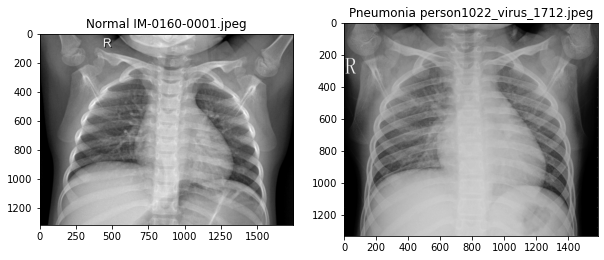

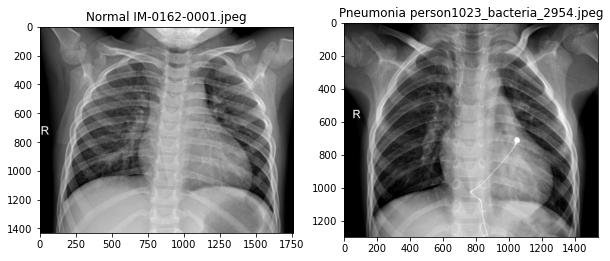

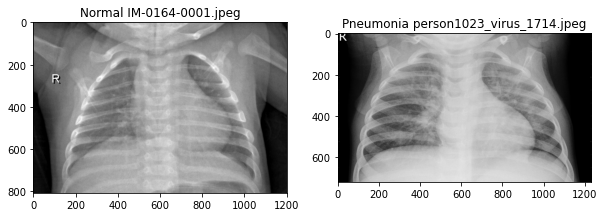

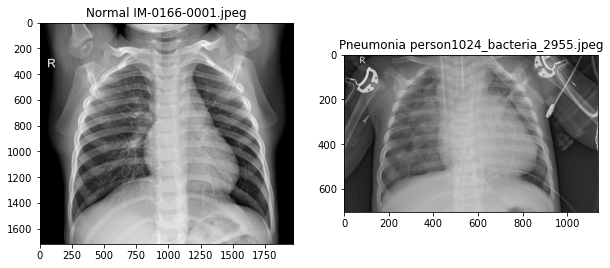

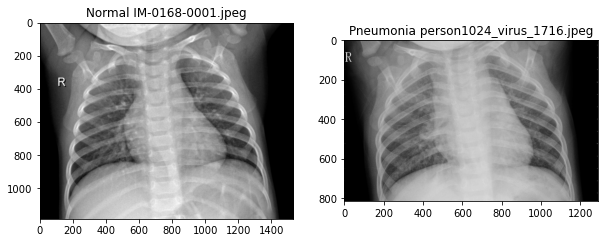

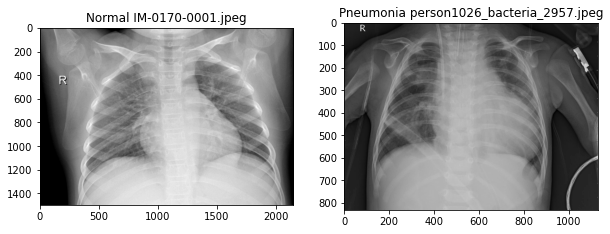

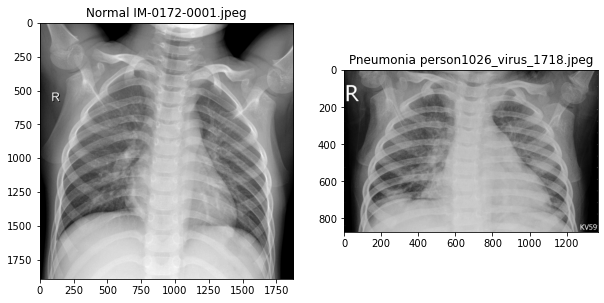

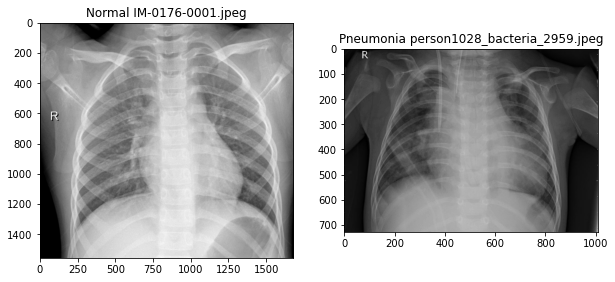

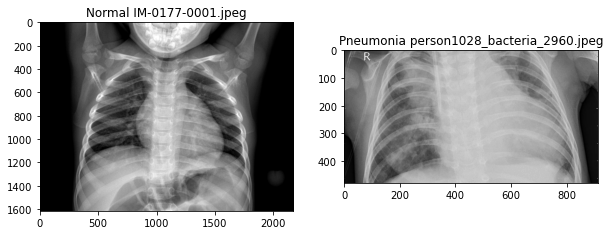

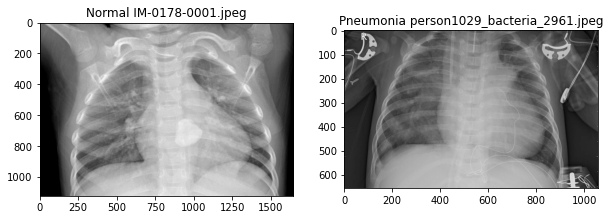

In [11]:
for i in range(0,10):
    # Load the images
    norm_img = Image.open(norm_pic_address[i])
    pneumonia_img = Image.open(pneumonia_address[i])

    #Let's plt these images
    ## plot normal picture
    f = plt.figure(figsize= (10,6))
    a1 = f.add_subplot(1,2,1)
    img_plot = plt.imshow(norm_img)
    a1.set_title(f'Normal {norm_pic[i]}')

    ## plot pneumonia picture
    a2 = f.add_subplot(1, 2, 2)
    img_plot = plt.imshow(pneumonia_img)
    a2.set_title(f'Pneumonia {pneumonia_pic[i]}')

2. Data Visualization and augmentation (1 mark)
  2. Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.

In [12]:
# Specify the Column Names while initializing the Table 
mytable = PrettyTable(["Method", "Setting"], 
                     title = "Settings for the image augmentation.") 
  
# Add rows 
mytable.add_row(["Rescale", "1/255"])
mytable.add_row(["Rotation Range", "30 degrees"])  
mytable.add_row(["Shear Range", "0.2"]) 
mytable.add_row(["Zoom Range", "0.2"]) 
mytable.add_row(["Samplewise std normalization", "True"]) 
mytable.add_row(["Height Shift", "0.2"])
mytable.add_row(["Width Shift", "0.2"]) 
mytable.add_row(["Horizontal Flip", "True"]) 

print(mytable)

+-------------------------------------------+
|    Settings for the image augmentation.   |
+------------------------------+------------+
|            Method            |  Setting   |
+------------------------------+------------+
|           Rescale            |   1/255    |
|        Rotation Range        | 30 degrees |
|         Shear Range          |    0.2     |
|          Zoom Range          |    0.2     |
| Samplewise std normalization |    True    |
|         Height Shift         |    0.2     |
|         Width Shift          |    0.2     |
|       Horizontal Flip        |    True    |
+------------------------------+------------+


Create a data augmentor

data_augmentor = ImageDataGenerator(samplewise_center=True, # set each sample mean to 0
                                   rescale=1./255, # rescale
                                    rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
                                   shear_range=0.2, # Randomly shear image 
                                   zoom_range = 0.2, # Randomly zoom image 
                                   samplewise_std_normalization=True, # divide each input by its std
                                    validation_split=0.2, 
                                   height_shift_range = 0.2, # randomly shift images horizontally (fraction of total height)
                                   width_shift_range = 0.2, # randomly shift images horizontally (fraction of total width)
                                   horizontal_flip = True) # randomly flip images

In [13]:
data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    rescale=1./255, 
                                    shear_range=0.2,
                                    zoom_range = 0.2,
                                    samplewise_std_normalization=True,
                                    validation_split=0.2) 

# Set hyperparameters
target_size = (128,128)   
target_dims = (128, 128, 3) # add channel for RGB
n_batch_size = 32 

2. Data Visualization and augmentation (1 mark)
  3. Bring the train and test data in the required format

In [14]:
# Create datasets
train_generator = data_augmentor.flow_from_directory(train_data_dir,  target_size=target_size, subset='training',batch_size= n_batch_size,class_mode='binary')
val_generator = data_augmentor.flow_from_directory(train_data_dir, target_size=target_size,subset='validation',class_mode='binary')
test_generator = data_augmentor.flow_from_directory(test_data_dir, target_size=target_size,batch_size= 1,class_mode=None, shuffle=False)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


2. Data Visualization and augmentation (1 mark)
  4. Print the shapes of train and test data

In [15]:
train_generator.image_shape

(128, 128, 3)

In [16]:
test_generator.image_shape

(128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

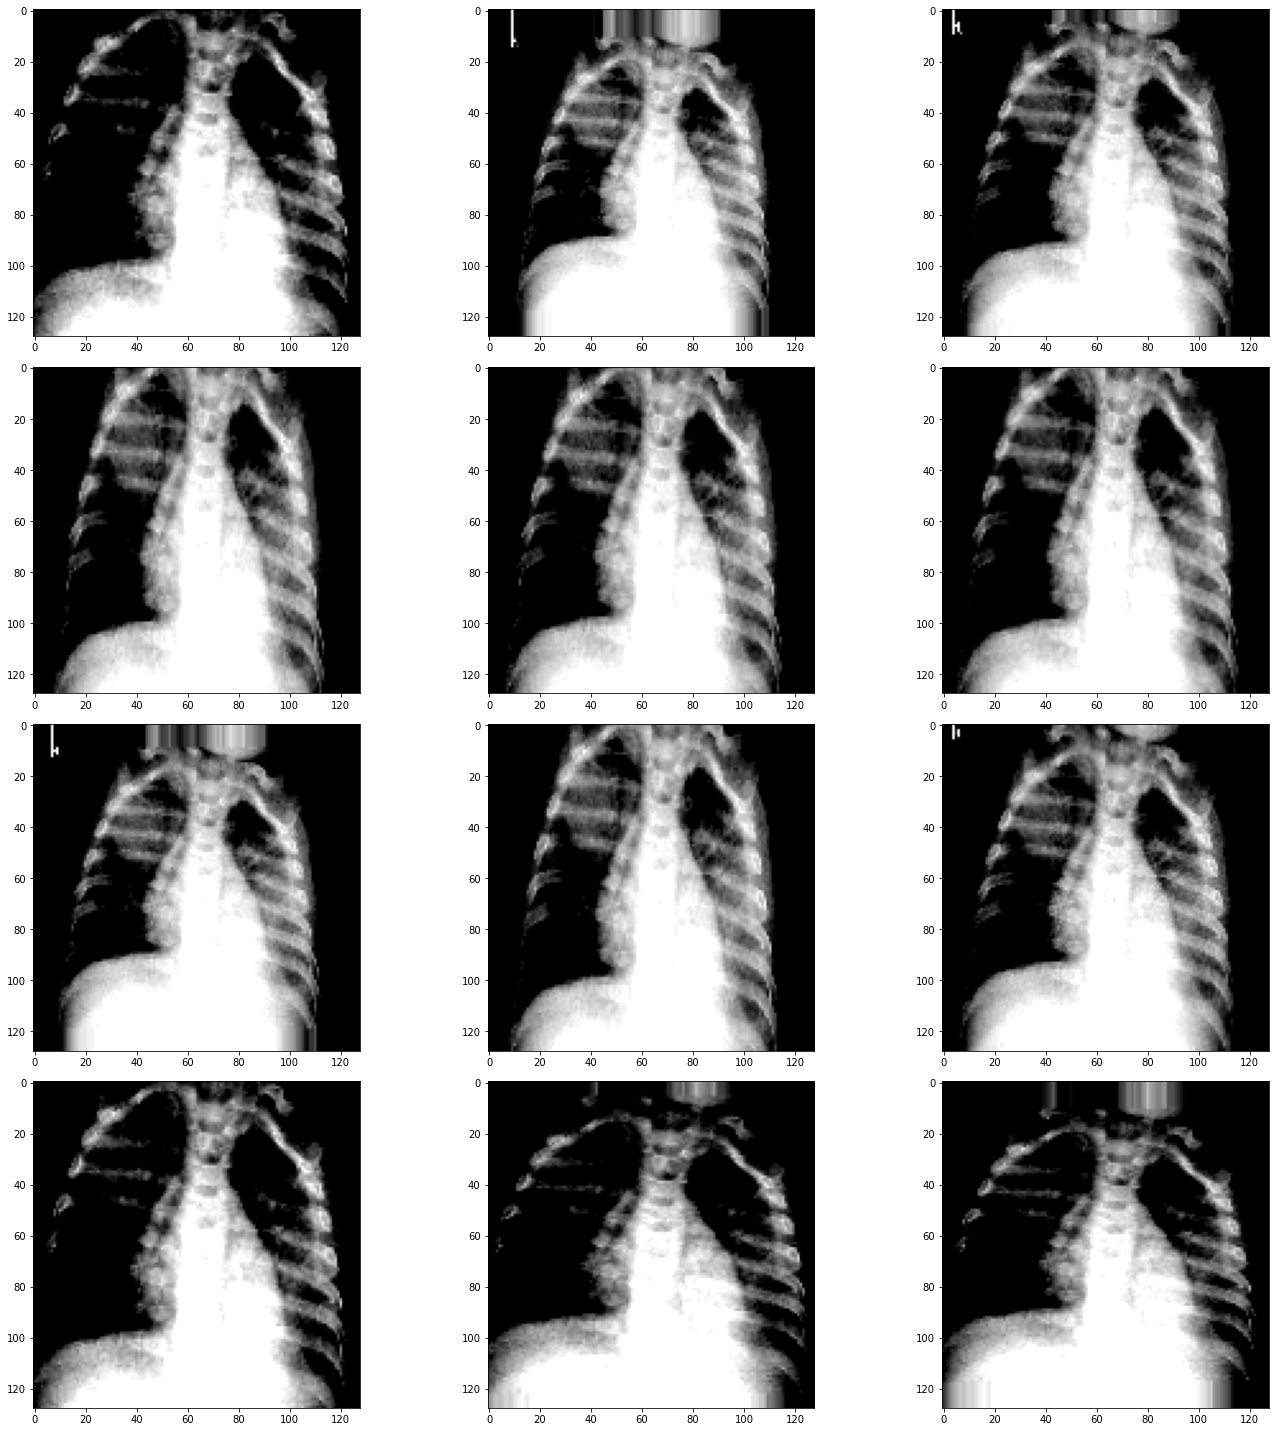

In [17]:
# udacity_intro_to_tensorflow_for_deep_learning/l05c04_exercise_flowers_with_data_augmentation_solution.ipynb#scrollTo=jqb9OGoVKIOi
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(4, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_generator[0][0][0] for i in range(12)]
plotImages(augmented_images)

3. Model Building (0.2*5 = 1 mark)

The Architecture
Our architecture for the CNN has been inspired by the article from Stephan and colleagues (2019) and Yadav and Sjadav (2019). Their neural network architectures were specifically designed for pneumonia image classification tasks. The proposed architecture consists of the convolution, max-pooling, and classification layers combined together. We will now dive into each component and why we chose them.

3. Model Building (0.2*5 = 1 mark)
  1. Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
  2. Add L2 regularization to all the layers.
  3. Add one layer of dropout at the appropriate position and give reasons.
  4. Choose the appropriate activation function for all the layers.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [18]:
#ANN
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def initialize_model(name): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
        return model_ann

In [19]:
tf.keras.regularizers.L2()

Dropout is used to prevent overfitting by temporarily “dropping” a neuron during training time at each iteration with probability p. Which means that all the inputs and outputs to this neuron will be disabled at the current iteration. The dropped-out neurons are resampled with probability p at every training step, so a dropped out neuron at one step can be active at the next one. The hyperparameter p is called the dropout-rate and we set it to 0.5, corresponding to 50% of the neurons being dropped out which is proposed as the best option for X-ray image classification (yadav & Jadhav, 2019).

3. Model Building (0.2*5 = 1 mark)
  5. Print the model summary.

4. Model Compilation (0.25 mark)
  1. Compile the model with the appropriate loss function.
  2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
  3. Use accuracy as a metric.

Regularization

In order to prevent our model to overtrain we implement the following regularization measures.

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [20]:
model_baseline = initialize_model(name="basemodel")
history_baseline = model_baseline.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.3, verbose=1),
            ModelCheckpoint("xray_model_v2.h5",save_best_only=True)]

5. Model Training (0.5 + 0.25 = 0.75 mark)
  1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
  2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.
 

In [21]:
history_baseline = model_baseline.fit(train_generator,
                                      batch_size=n_batch_size,
                                      epochs=5,
                                      validation_data=val_generator,shuffle=True,
                                      callbacks=callback) #,class_weight=class_weights)

Epoch 1/5
131/131 [==============================] - 86s 650ms/step - loss: 9.5111 - accuracy: 0.0048 - val_loss: 9.5757 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/5
131/131 [==============================] - 81s 622ms/step - loss: 9.5743 - accuracy: 0.0000e+00 - val_loss: 9.5757 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/5
131/131 [==============================] - ETA: 0s - loss: 9.5743 - accuracy: 0.0000e+00
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
131/131 [==============================] - 82s 623ms/step - loss: 9.5743 - accuracy: 0.0000e+00 - val_loss: 9.5757 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 4/5
131/131 [==============================] - 83s 633ms/step - loss: 9.5743 - accuracy: 0.0000e+00 - val_loss: 9.5757 - val_accuracy: 0.0000e+00 - lr: 0.0030
Epoch 5/5
131/131 [==============================] - ETA: 0s - loss: 9.5743 - accuracy: 0.0000e+00
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00090000000782310

6. Model Evaluation (0.5 + 0.5 = 1 mark)
  1. Print the final train and validation loss and accuracy.

In [22]:
scores = model_baseline.evaluate(val_generator)
scores

33/33 [==============================] - 16s 482ms/step - loss: 9.5757 - accuracy: 0.0000e+00


[9.57569694519043, 0.0]

In [23]:
history_baseline.history['accuracy']

[0.004792714957147837, 0.0, 0.0, 0.0, 0.0]

In [24]:
history_baseline.history['val_accuracy']

[0.0, 0.0, 0.0, 0.0, 0.0]

In [25]:
print(history_baseline.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


Evaluate our model by looking at a graph

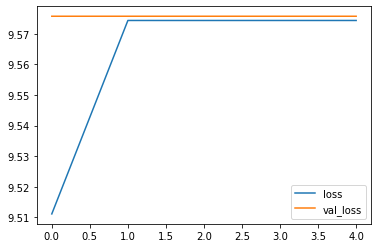

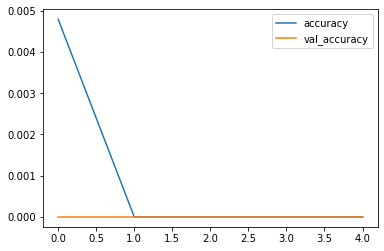

In [26]:
history_frame = pd.DataFrame(history_baseline.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

6. Model Evaluation (0.5 + 0.5 = 1 mark)
  1. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.

In [27]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cm = np.around(cm, decimals=2)
            cm[np.isnan(cm)] = 0.0
            print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
target_names

['NORMAL', 'PNEUMONIA']

In [29]:
y_preds_base = model_baseline.predict(val_generator)
y_pred_base = np.argmax(y_preds_base, axis=1)
print(y_pred_base)

[3 3 3 ... 3 3 3]


Confusion Matrix
Normalized confusion matrix


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


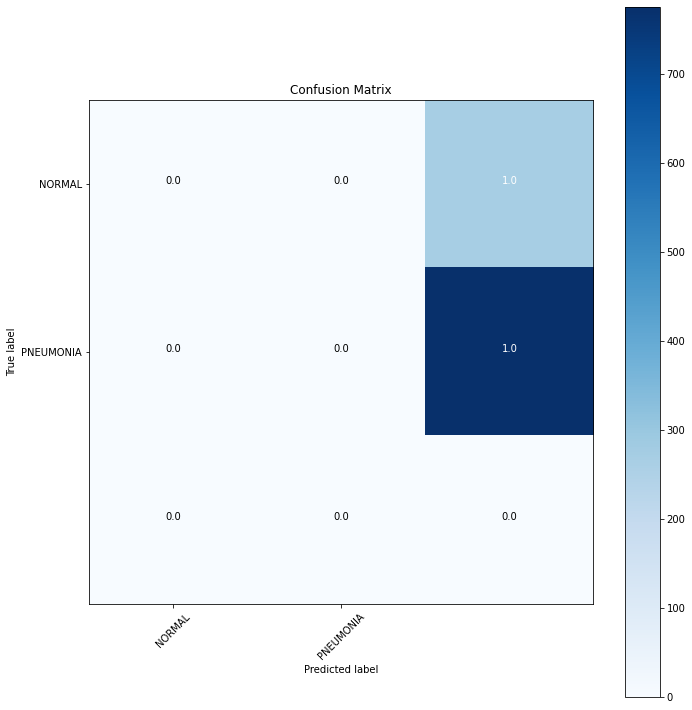

In [ ]:
print('Confusion Matrix')
cm_base = confusion_matrix(val_generator.classes, y_pred_base)
plot_confusion_matrix(cm_base, target_names, title='Confusion Matrix')

6. Model Evaluation (0.5 + 0.5 = 1 mark)
    2. Print the two most incorrectly classified images for each class in the test dataset.

for y_preds highest probability will be highest accuracy. Now from array of array we need to pickup best probability by argmax and then from that final array we have to pick the lowest probability. i.e. lowest performing or confident data or image

In [30]:
def plotImagesFalsePositive(images_arr):
    fig, axes = plt.subplots(1, 2, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[1. 1. 1. ... 1. 1. 1.]
0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


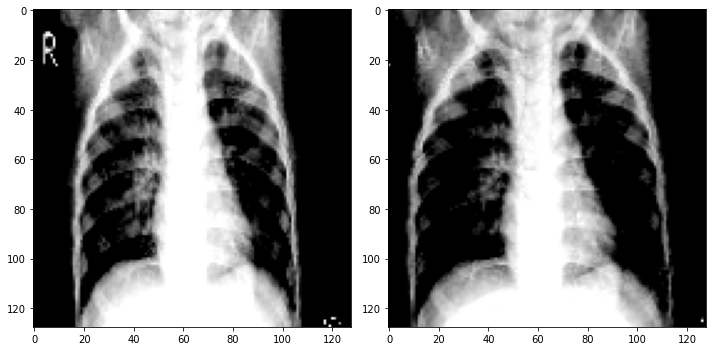

In [ ]:
print(y_preds_base)
maxprobabArr = np.amax(y_preds_base, axis=1) #get max value at each row
print(maxprobabArr)
index = np.argmin(maxprobabArr) #get min index
print(index)
#print the image
im = [train_generator[0][0][0] for i in range(2)]
plotImagesFalsePositive(im)

Hyperparameter Tuning- Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

  1. Optimiser: Use a different optimizer with the appropriate LR value.
  2. Network Depth: Change the number of hidden layers and hidden units for each layer.
Write a comparison between each model and give reasons for the difference in results.

Now building another model_1 with diff LR and layer and optimizer

In [31]:
#ANN
#Build the model
def initialize_model_1(name): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(600,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(800,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(400,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(200,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(400,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001), metrics=['accuracy'])
        return model_ann

In [32]:
model_1 = initialize_model_1(name="model_1")
history_1 = model_baseline.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001), metrics=['accuracy'])
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.3, verbose=1),
            ModelCheckpoint("xray_model_v2.h5",save_best_only=True)]

In [33]:
history_1 = model_1.fit(train_generator,
                          batch_size=n_batch_size,
                          epochs=5,
                          validation_data=val_generator,shuffle=True,
                          callbacks=callback) #,class_weight=class_weights)

Epoch 1/5
131/131 [==============================] - 89s 674ms/step - loss: 1.1178 - accuracy: 0.2044 - val_loss: 1.1112 - val_accuracy: 0.2128 - lr: 0.0010
Epoch 2/5
131/131 [==============================] - 88s 670ms/step - loss: 1.1101 - accuracy: 0.2308 - val_loss: 1.1090 - val_accuracy: 0.2148 - lr: 0.0010
Epoch 3/5
131/131 [==============================] - 87s 666ms/step - loss: 1.1086 - accuracy: 0.2363 - val_loss: 1.1081 - val_accuracy: 0.2138 - lr: 0.0010
Epoch 4/5
131/131 [==============================] - 87s 665ms/step - loss: 1.1078 - accuracy: 0.2459 - val_loss: 1.1076 - val_accuracy: 0.2224 - lr: 0.0010
Epoch 5/5
131/131 [==============================] - 95s 725ms/step - loss: 1.1075 - accuracy: 0.2344 - val_loss: 1.1073 - val_accuracy: 0.2531 - lr: 0.0010


In [69]:
scores = model_1.evaluate(val_generator)
scores

33/33 [==============================] - 15s 458ms/step - loss: 1.1081 - accuracy: 0.2637


[1.1080809831619263, 0.26366251707077026]

In [70]:
history_1.history['accuracy']

[0.27677929401397705,
 0.2556913495063782,
 0.2506589889526367,
 0.25641027092933655,
 0.24754373729228973]

In [71]:
history_1.history['val_accuracy']

[0.2751677930355072,
 0.2790028750896454,
 0.25311601161956787,
 0.21668264269828796,
 0.22051773965358734]

In [72]:
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


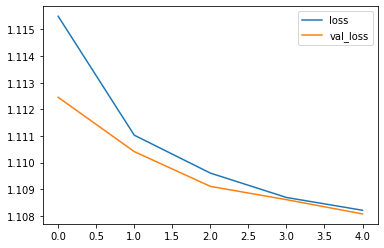

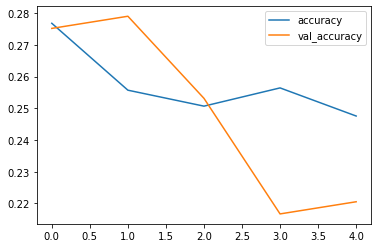

In [73]:
history_frame = pd.DataFrame(history_1.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [74]:
y_preds_1 = model_1.predict(val_generator)
y_pred_1 = np.argmax(y_preds_1, axis=1)
y_pred_1

array([2, 3, 0, ..., 1, 0, 2], dtype=int64)

In [76]:
print('Confusion Matrix')
cm_1 = confusion_matrix(val_generator.classes, y_pred_1)
plot_confusion_matrix(cm_1, target_names, title='Confusion Matrix')

Confusion Matrix


NameError: name 'target_names' is not defined

[[0.25300354 0.24963252 0.2566418  0.24072216]
 [0.25777593 0.2951106  0.15282433 0.2942891 ]
 [0.2322528  0.27157435 0.2648088  0.23136406]
 ...
 [0.25290194 0.26682067 0.23049212 0.2497853 ]
 [0.21705262 0.25917214 0.26893207 0.25484318]
 [0.25333834 0.25889006 0.2608419  0.22692968]]
[0.2566418  0.2951106  0.27157435 ... 0.26682067 0.26893207 0.2608419 ]
943


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


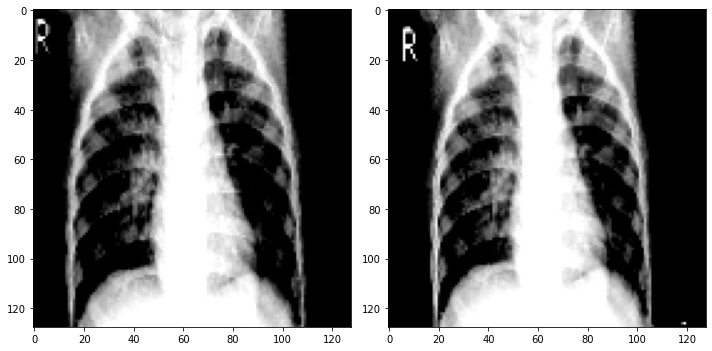

In [ ]:
print(y_preds_1)
maxprobabArr = np.amax(y_preds_1, axis=1) #get max value at each row
print(maxprobabArr)
index = np.argmin(maxprobabArr) #get min index
print(index)
#print the image
im = [train_generator[0][0][0] for i in range(2)]
plotImagesFalsePositive(im)

Now building another model_2 with diff LR and layer and optimizer

In [ ]:
#ANN
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def initialize_model_2(name): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(400,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(600,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(400,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer        
        model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.02), metrics=['accuracy'])
        return model_ann

In [ ]:
model_2 = initialize_model_2(name="model_2")
history_2 = model_baseline.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.02), metrics=['accuracy'])
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.3, verbose=1),
            ModelCheckpoint("xray_model_v2.h5",save_best_only=True)]

In [ ]:
history_2 = model_2.fit(train_generator,
                          batch_size=n_batch_size,
                          epochs=5,
                          validation_data=val_generator,shuffle=True,
                          callbacks=callback) #,class_weight=class_weights)

Epoch 1/5
131/131 [==============================] - 109s 826ms/step - loss: 9.5006 - accuracy: 0.7335 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0200
Epoch 2/5
131/131 [==============================] - 107s 814ms/step - loss: 9.5743 - accuracy: 0.7429 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0200
Epoch 3/5
131/131 [==============================] - ETA: 0s - loss: 9.5743 - accuracy: 0.7429
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.005999999865889549.
131/131 [==============================] - 107s 814ms/step - loss: 9.5743 - accuracy: 0.7429 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0200
Epoch 4/5
131/131 [==============================] - 106s 812ms/step - loss: 9.5743 - accuracy: 0.7429 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0060
Epoch 5/5
131/131 [==============================] - ETA: 0s - loss: 9.5743 - accuracy: 0.7429
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.001800000015646219.
131/131 [=====================

In [ ]:
scores = model_2.evaluate(val_generator)
scores

33/33 [==============================] - 20s 607ms/step - loss: 9.5757 - accuracy: 0.7430


[9.575693130493164, 0.743048906326294]

In [ ]:
history_2.history['accuracy']

[0.7335250377655029,
 0.7428708076477051,
 0.7428708076477051,
 0.7428708076477051,
 0.7428708076477051]

In [ ]:
history_2.history['val_accuracy']

[0.743048906326294,
 0.743048906326294,
 0.743048906326294,
 0.743048906326294,
 0.743048906326294]

In [ ]:
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


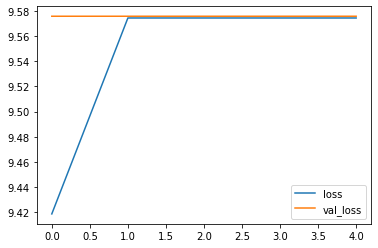

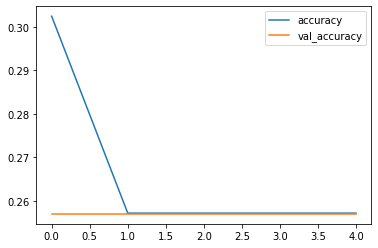

In [ ]:
history_frame = pd.DataFrame(history_2.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
y_preds_2 = model_2.predict(val_generator)
y_pred_2 = np.argmax(y_preds_2, axis=1)
y_pred_2

array([1, 1, 1, ..., 1, 1, 1])

Confusion Matrix
Normalized confusion matrix


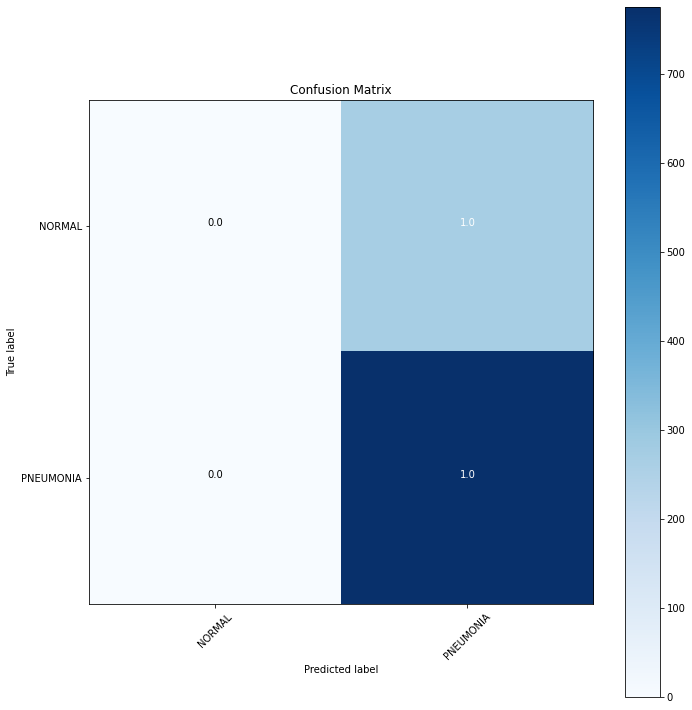

In [ ]:
print('Confusion Matrix')
cm_2 = confusion_matrix(val_generator.classes, y_pred_2)
plot_confusion_matrix(cm_2, target_names, title='Confusion Matrix')

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[1. 1. 1. ... 1. 1. 1.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


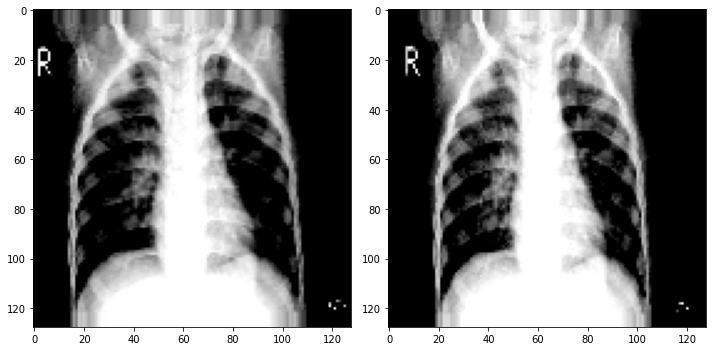

In [ ]:
print(y_preds_2)
maxprobabArr = np.amax(y_preds_2, axis=1) #get max value at each row
print(maxprobabArr)
index = np.argmin(maxprobabArr) #get min index
#print the image
im = [train_generator[0][0][0] for i in range(2)]
plotImagesFalsePositive(im)

Now building another model_3 with diff LR and layer and optimizer

In [ ]:
#ANN
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def initialize_model_3(name): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(600,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(800,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(400,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(800,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), metrics=['accuracy'])
        return model_ann

In [ ]:
model_3 = initialize_model_3(name="model_3")
history_3 = model_baseline.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adamax(learning_rate=0.002), metrics=['accuracy'])
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.3, verbose=1),
            ModelCheckpoint("xray_model_v2.h5",save_best_only=True)]

In [ ]:
history_3 = model_3.fit(train_generator,
                          batch_size=n_batch_size,
                          epochs=5,
                          validation_data=val_generator,shuffle=True,
                          callbacks=callback) #,class_weight=class_weights)

Epoch 1/5
131/131 [==============================] - 118s 894ms/step - loss: 9.5066 - accuracy: 0.7369 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0020
Epoch 2/5
131/131 [==============================] - 114s 873ms/step - loss: 9.5743 - accuracy: 0.7429 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0020
Epoch 3/5
131/131 [==============================] - ETA: 0s - loss: 9.5743 - accuracy: 0.7429
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
131/131 [==============================] - 115s 876ms/step - loss: 9.5743 - accuracy: 0.7429 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 0.0020
Epoch 4/5
131/131 [==============================] - 116s 883ms/step - loss: 9.5743 - accuracy: 0.7429 - val_loss: 9.5757 - val_accuracy: 0.7430 - lr: 6.0000e-04
Epoch 5/5
131/131 [==============================] - ETA: 0s - loss: 9.5743 - accuracy: 0.7429
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00018000000854954124.
131/131 [==============

In [ ]:
scores = model_3.evaluate(val_generator)
scores

33/33 [==============================] - 21s 629ms/step - loss: 9.5757 - accuracy: 0.7430


[9.575695991516113, 0.743048906326294]

In [ ]:
history_3.history['accuracy']

[0.7368799448013306,
 0.7428708076477051,
 0.7428708076477051,
 0.7428708076477051,
 0.7428708076477051]

In [ ]:
history_3.history['val_accuracy']

[0.743048906326294,
 0.743048906326294,
 0.743048906326294,
 0.743048906326294,
 0.743048906326294]

In [ ]:
print(history_3.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


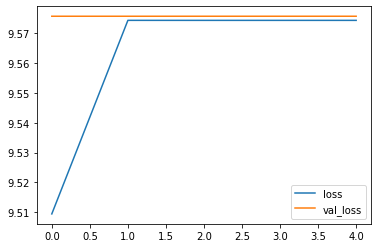

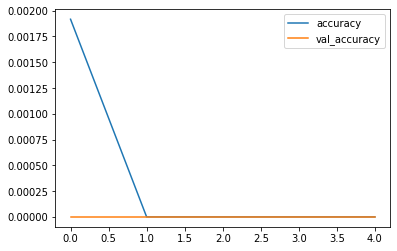

In [ ]:
history_frame = pd.DataFrame(history_3.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
y_preds_3 = model_3.predict(val_generator)
y_pred_3 = np.argmax(y_preds_3, axis=1)
y_pred_3

array([1, 1, 1, ..., 1, 1, 1])

Confusion Matrix
Normalized confusion matrix


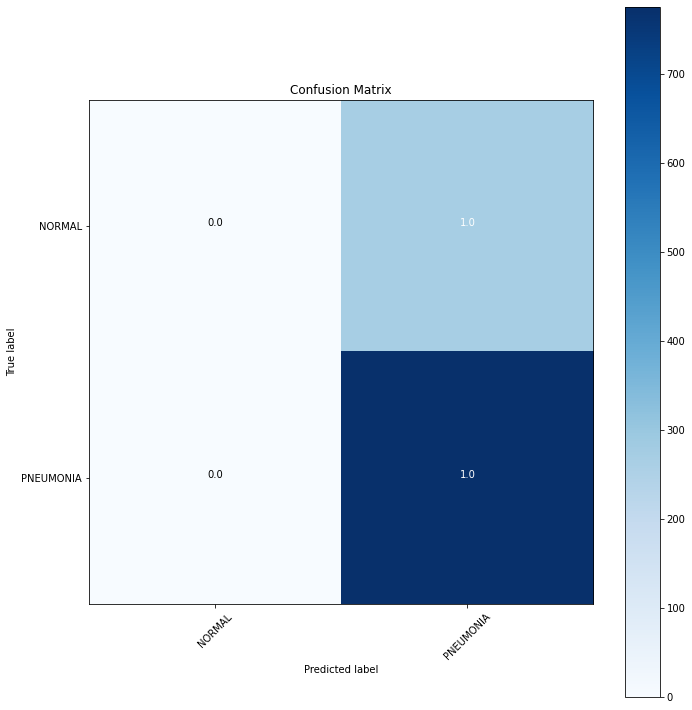

In [ ]:
print('Confusion Matrix')
cm_3 = confusion_matrix(val_generator.classes, y_pred_3)
plot_confusion_matrix(cm_3, target_names, title='Confusion Matrix')

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
[1. 1. 1. ... 1. 1. 1.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


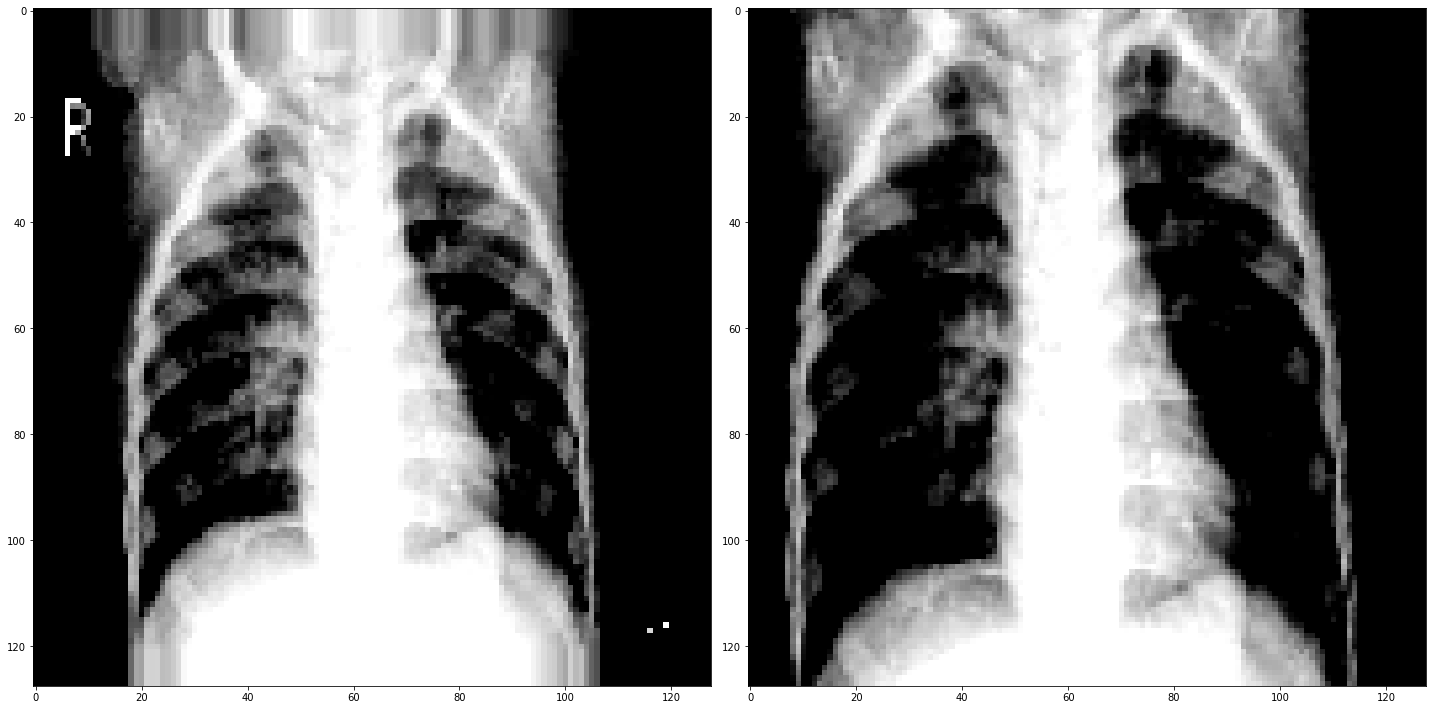

In [ ]:
print(y_preds_3)
maxprobabArr = np.amax(y_preds_3, axis=1) #get max value at each row
print(maxprobabArr)
index = np.argmin(maxprobabArr) #get min index
#print the image
im = [train_generator[0][0][0] for i in range(2)]
plotImagesFalsePositive(im)


Now building another model_4 with diff LR and layer and optimizer

In [ ]:
#ANN
#Build the model
# 3 layers, 1 layer to flatten the image to a 28 x 28 = 784 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 10 neurons and softmax function
#Create the neural network model
def initialize_model_4(name): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3)),
            keras.layers.Dense(600,kernel_initializer='variance_scaling', activation=tf.nn.relu),
            keras.layers.Dense(800,kernel_initializer='variance_scaling', activation=tf.nn.relu),
            keras.layers.Dense(400,kernel_initializer='variance_scaling', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='variance_scaling', activation=tf.nn.relu),
            keras.layers.Dense(800,kernel_initializer='variance_scaling', activation=tf.nn.relu),
            keras.layers.Dense(500,kernel_initializer='variance_scaling', activation=tf.nn.relu),
            keras.layers.Dense(4, kernel_initializer='truncated_normal',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.005), metrics=['accuracy'])
        return model_ann

In [ ]:
model_4 = initialize_model_4(name="model_4")
history_4 = model_baseline.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.005), metrics=['accuracy'])
callback = [EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True),
            ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor=0.3, verbose=1),
            ModelCheckpoint("xray_model_v2.h5",save_best_only=True)]

In [ ]:
history_4 = model_4.fit(train_generator,
                          batch_size=n_batch_size,
                          epochs=5,
                          validation_data=val_generator,shuffle=True,
                          callbacks=callback) #,class_weight=class_weights)

Epoch 1/5
131/131 [==============================] - 140s 1s/step - loss: 1.1039 - accuracy: 0.2559 - val_loss: 1.1040 - val_accuracy: 0.2570 - lr: 0.0050
Epoch 2/5
131/131 [==============================] - 131s 1000ms/step - loss: 1.1038 - accuracy: 0.2571 - val_loss: 1.1040 - val_accuracy: 0.2570 - lr: 0.0050
Epoch 3/5
131/131 [==============================] - ETA: 0s - loss: 1.1038 - accuracy: 0.2571
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0014999999664723873.
131/131 [==============================] - 130s 988ms/step - loss: 1.1038 - accuracy: 0.2571 - val_loss: 1.1040 - val_accuracy: 0.2570 - lr: 0.0050
Epoch 4/5
131/131 [==============================] - 129s 986ms/step - loss: 1.1038 - accuracy: 0.2571 - val_loss: 1.1040 - val_accuracy: 0.2570 - lr: 0.0015
Epoch 5/5
131/131 [==============================] - ETA: 0s - loss: 1.1038 - accuracy: 0.2571
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00045000000391155477.
131/131 [====================

In [ ]:
scores = model_4.evaluate(val_generator)
scores

33/33 [==============================] - 22s 664ms/step - loss: 1.1040 - accuracy: 0.2570


[1.1040042638778687, 0.25695109367370605]

In [ ]:
history_4.history['accuracy']

[0.25593098998069763,
 0.25712916254997253,
 0.25712916254997253,
 0.25712916254997253,
 0.25712916254997253]

In [ ]:
history_4.history['val_accuracy']

[0.25695109367370605,
 0.25695109367370605,
 0.25695109367370605,
 0.25695109367370605,
 0.25695109367370605]

In [ ]:
print(history_4.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


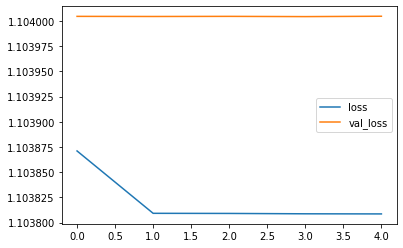

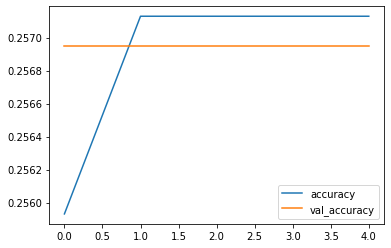

In [ ]:
history_frame = pd.DataFrame(history_4.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
y_preds_4 = model_4.predict(val_generator)
y_pred_4 = np.argmax(y_preds_4, axis=1)
y_pred_4

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
Normalized confusion matrix


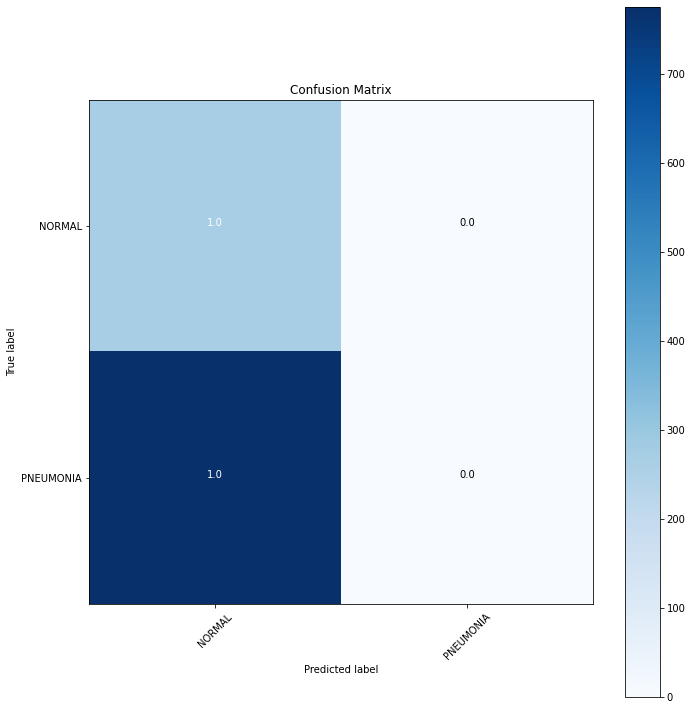

In [ ]:
print('Confusion Matrix')
cm_4 = confusion_matrix(val_generator.classes, y_pred_4)
plot_confusion_matrix(cm_4, target_names, title='Confusion Matrix')

[[0.25001115 0.24999622 0.2500023  0.2499904 ]
 [0.25001115 0.24999622 0.2500023  0.2499904 ]
 [0.25001115 0.24999622 0.2500023  0.2499904 ]
 ...
 [0.25001115 0.24999622 0.2500023  0.2499904 ]
 [0.25001115 0.24999622 0.2500023  0.2499904 ]
 [0.25001115 0.24999622 0.2500023  0.2499904 ]]
[0.25001115 0.25001115 0.25001115 ... 0.25001115 0.25001115 0.25001115]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


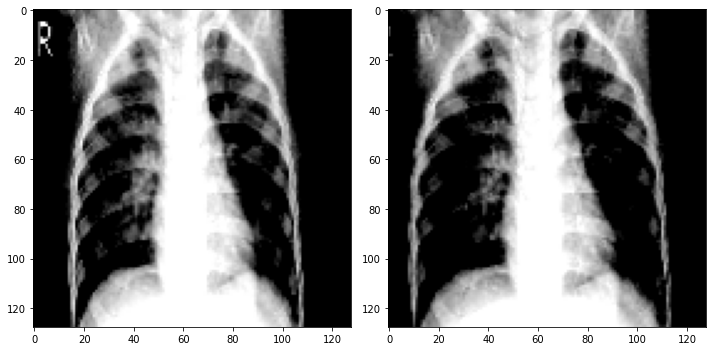

In [ ]:
print(y_preds_4)
maxprobabArr = np.amax(y_preds_4, axis=1) #get max value at each row
print(maxprobabArr)
index = np.argmin(maxprobabArr) #get min index
#print the image
im = [train_generator[0][0][0] for i in range(2)]
plotImagesFalsePositive(im)


Conclusion
* different learning rate and optimiser and hidden layer given different accuracy and prediction
*less learning rate given better prediction